# Mini Project3
### 20181531 김연주

In [14]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from datetime import datetime
import matplotlib as mpl
import matplotlib.pyplot as plt

In [15]:
import numpy as np
import pandas as pd

housing = pd.read_csv("csv/kc_house_data.csv")

housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [3]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer()

x=["date","price","bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15"]

df = pd.DataFrame(housing, columns=x)
df['year'] = pd.DatetimeIndex(df['date']).year
df = df.drop(['date'], axis=1)

df = pd.DataFrame(imputer.fit_transform(df))
df.columns = ["price","bedrooms","bathrooms","sqft_living","sqft_lot","floors","waterfront","view","condition","grade","sqft_above","sqft_basement","yr_built","yr_renovated","zipcode","lat","long","sqft_living15","sqft_lot15","year"]

df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652,2014.322954
std,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631,0.467616
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000,2014.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,2014.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000,2015.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000


<AxesSubplot:xlabel='nprice', ylabel='grade'>

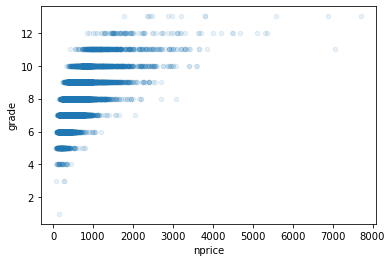

In [4]:
df['nprice'] = df['price'] / 1000
df.plot.scatter(x='nprice',y='grade', alpha=0.1)

<AxesSubplot:xlabel='nprice', ylabel='bedrooms'>

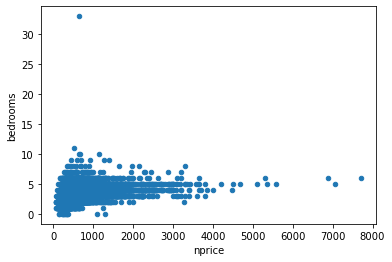

In [5]:
df.plot.scatter(x='nprice',y='bedrooms', alpha=1)

<AxesSubplot:xlabel='nprice', ylabel='bedrooms'>

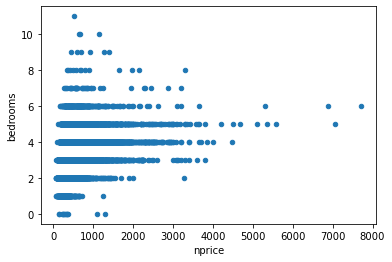

In [6]:
df = df[df.bedrooms != 33]
df.plot.scatter(x='nprice',y='bedrooms',alpha=1)

In [7]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,nprice
price,1.000000,0.315445,0.525147,0.702047,0.089664,0.256811,0.266371,0.397299,0.036336,0.667447,...,0.323812,0.054023,0.126437,-0.053209,0.306998,0.021637,0.585404,0.082451,0.003585,1.000000
bedrooms,0.315445,1.000000,0.529159,0.591467,0.032807,0.181085,-0.006611,0.081930,0.025478,0.366502,...,0.309490,0.159167,0.019617,-0.157093,-0.010541,0.133882,0.402626,0.030402,-0.009035,0.315445
bathrooms,0.525147,0.529159,1.000000,0.754663,0.087735,0.500645,0.063742,0.187732,-0.124946,0.664979,...,0.283789,0.506012,0.050735,-0.203858,0.024594,0.223028,0.568628,0.087170,-0.026612,0.525147
sqft_living,0.702047,0.591467,0.754663,1.000000,0.172822,0.353937,0.103816,0.284606,-0.058704,0.762701,...,0.435065,0.318037,0.055358,-0.199421,0.052552,0.240209,0.756419,0.183280,-0.029055,0.702047
sqft_lot,0.089664,0.032807,0.087735,0.172822,1.000000,-0.005210,0.021603,0.074707,-0.008935,0.113616,...,0.015293,0.053073,0.007641,-0.129571,-0.085675,0.229516,0.144602,0.718556,0.005461,0.089664
floors,0.256811,0.181085,0.500645,0.353937,-0.005210,1.000000,0.023695,0.029432,-0.263706,0.458171,...,-0.245684,0.489302,0.006330,-0.059102,0.049655,0.125388,0.279856,-0.011282,-0.022345,0.256811
waterfront,0.266371,-0.006611,0.063742,0.103816,0.021603,0.023695,1.000000,0.401857,0.016665,0.082773,...,0.080591,-0.026165,0.092884,0.030287,-0.014270,-0.041914,0.086461,0.030702,-0.004168,0.266371
view,0.397299,0.081930,0.187732,0.284606,0.074707,0.029432,0.401857,1.000000,0.046031,0.251315,...,0.276959,-0.053452,0.103915,0.084834,0.006170,-0.078413,0.280432,0.072571,0.001354,0.397299
condition,0.036336,0.025478,-0.124946,-0.058704,-0.008935,-0.263706,0.016665,0.046031,1.000000,-0.144632,...,0.174057,-0.361380,-0.060602,0.002973,-0.015048,-0.106423,-0.092731,-0.003373,-0.045518,0.036336
grade,0.667447,0.366502,0.664979,0.762701,0.113616,0.458171,0.082773,0.251315,-0.144632,1.000000,...,0.168412,0.446952,0.014409,-0.184852,0.114111,0.198355,0.713198,0.119241,-0.030405,0.667447


In [8]:
housing_labels=df.price
housing_prepared=df.drop(['price'],axis=1)

In [9]:
housing_prepared['bathrooms'].value_counts()

2.50    5380
1.00    3852
1.75    3047
2.25    2047
2.00    1930
1.50    1446
2.75    1185
3.00     753
3.50     731
3.25     589
3.75     155
4.00     136
4.50     100
4.25      79
0.75      72
4.75      23
5.00      21
5.25      13
0.00      10
5.50      10
1.25       9
6.00       6
5.75       4
0.50       4
6.25       2
8.00       2
6.75       2
6.50       2
7.75       1
7.50       1
Name: bathrooms, dtype: int64

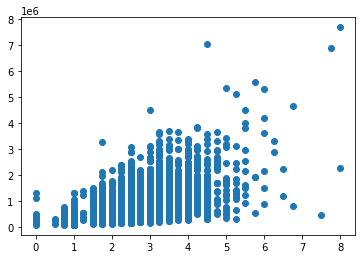

In [10]:
plt.scatter(housing_prepared['bathrooms'], housing_labels)

In [11]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [12]:
models = []
models.append(('LR', LinearRegression()))
models.append(('CART', DecisionTreeRegressor(random_state=42)))
models.append(('RF', RandomForestRegressor(random_state=42, n_estimators=100)))
models.append(('ET', ExtraTreesRegressor(random_state=42, n_estimators=100)))
models.append(('AB', AdaBoostRegressor(random_state=42)))
models.append(('GBM', GradientBoostingRegressor(random_state=42 )))
results = []
names = []
metrics = []

In [13]:
for name, model in models:
    cv_results = cross_val_score(model, housing_prepared, housing_labels, cv=10, scoring='neg_mean_squared_error')
    cv_scores = np.sqrt(-cv_results)
    results.append(cv_scores)
    names.append(name)
    metrics.append(cv_scores.mean())
    msg = "%s: %f" % (name, cv_scores.mean())
    print(msg)

LR: 0.000000 (0.000000)
CART: 14608.748195 (18260.912037)
RF: 9672.850678 (10473.991831)
ET: 9319.525364 (6989.335400)
AB: 69470.443076 (6408.622480)
GBM: 9577.122704 (6152.772613)
Average metrics (RMSE) from all models: 18774.78166948783


In [17]:
et_reg = ExtraTreesRegressor(random_state=42, n_estimators=100)
et_reg.fit(housing_prepared, housing_labels)

ExtraTreesRegressor(random_state=42)

In [18]:
et_scores = cross_val_score(et_reg, housing_prepared, housing_labels,
                                scoring="neg_mean_squared_error", cv=10)
et_rmse_scores = np.sqrt(-et_scores)
display_scores(et_rmse_scores)

Scores: [ 7209.81403053 23347.73521541  3351.94962442 19123.81254033
  3644.1023763  15184.36161757  6512.29819087  2667.20433859
  8884.28225906  3269.69344466]
Mean: 9319.525363773088
Standard deviation: 6989.3354004454


## 결과: 9319.525363773088